In [1]:
#For mean and mode imputation methods
import pandas as pd
from sklearn.impute import SimpleImputer
import numpy as np
#Example dataset
data = {'Age': [25, np.nan, 35, 40, np.nan],
      'BloodPressure': [120, 130, np.nan, 110, 125],
      'Gender': ['M', 'F', np.nan, 'M', 'F']}
df = pd.DataFrame(data)
#Mean imputation for numeric columns
mean_imputer = SimpleImputer (strategy='mean')
df[['Age', 'BloodPressure']] = mean_imputer.fit_transform(df[['Age', 'BloodPressure']])
#Mode imputation for categorical columns
mode_imputer = SimpleImputer (strategy='most_frequent')
df[['Gender']] = mode_imputer.fit_transform(df[['Gender']])
print(df)

         Age  BloodPressure Gender
0  25.000000         120.00      M
1  33.333333         130.00      F
2  35.000000         121.25      F
3  40.000000         110.00      M
4  33.333333         125.00      F


In [6]:
from sklearn.impute import KNNImputer
data = {'Age': [25, np.an, 35, 40, np.nan],
        'BloodPressure': [120, 130, np.nan, 110, 125]}

df = pd.DataFrame(data)
imputer = KNNImputer(n_neighbor>=2)
df_imputed = imputer.fit_transform(df)
df_knn = pd.DataFrame (df_imputed, columns=df.columns)
print(df_knn)

Original data:
    Age  BloodPressure
0  25.0          120.0
1   NaN          130.0
2  35.0            NaN
3  40.0          110.0
4   NaN          125.0

Imputed data using KNN:
    Age  BloodPressure
0  25.0          120.0
1  32.5          130.0
2  35.0          115.0
3  40.0          110.0
4  32.5          125.0


In [3]:
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
data = {
    'Age': [25, np.nan, 35, 40, np.nan],
    'BloodPressure': [120, 130, np.nan, 110, 125],
    'Cholesterol': [200, 190, 210, np.nan, 195]
}
df = pd.DataFrame(data)
imputer = IterativeImputer(max_iter=10, random_state=0)
df_mice = imputer.fit_transform(df)
df_mice = pd.DataFrame(df_mice, columns=df.columns)
print(df_mice)

         Age  BloodPressure  Cholesterol
0  25.000000     120.000000   200.000000
1  13.729194     130.000000   190.000000
2  35.000000     110.021846   210.000000
3  40.000000     110.000000   210.000908
4  19.611674     125.000000   195.000000


/Applications/CODES/AiHC/.venv/lib/python3.13/site-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [7]:
# Example: IoT sensor readings
ts = pd.Series([98, np.nan, np.nan, 102, 105, np.nan, 110])
# Forward fill

print(ts.fillna (method='ffill'))

# Backward fill
print(ts.fillna (method='bfill'))

# Linear interpolation 
print(ts.interpolate(method='linear'))

0     98.0
1     98.0
2     98.0
3    102.0
4    105.0
5    105.0
6    110.0
dtype: float64
0     98.0
1    102.0
2    102.0
3    102.0
4    105.0
5    110.0
6    110.0
dtype: float64
0     98.000000
1     99.333333
2    100.666667
3    102.000000
4    105.000000
5    107.500000
6    110.000000
dtype: float64


/var/folders/m7/cxy5x_m16yg7yj7qmrxswlqr0000gn/T/ipykernel_29564/2049614248.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  print(ts.fillna (method='ffill'))
/var/folders/m7/cxy5x_m16yg7yj7qmrxswlqr0000gn/T/ipykernel_29564/2049614248.py:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  print(ts.fillna (method='bfill'))


# Hot-Deck and Cold-Deck Imputation with Machine Learning
In this example, we'll:
1. Load a public dataset (Breast Cancer Wisconsin dataset)
2. Artificially introduce missing values
3. Apply hot-deck and cold-deck imputation methods
4. Train a simple ML model (Random Forest classifier)
5. Compare accuracy metrics across imputation methods

## What are Hot-deck and Cold-deck imputation?
- **Hot-deck imputation**: Replaces missing values with values from similar records in the same dataset
- **Cold-deck imputation**: Replaces missing values with values from an external source/reference dataset

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import random

# Set random seed for reproducibility
np.random.seed(42)
random.seed(42)

# Load breast cancer dataset
cancer = load_breast_cancer()
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = pd.Series(cancer.target)

print(f"Dataset shape: {X.shape}")
print(f"Number of features: {X.shape[1]}")
print(f"Number of classes: {len(np.unique(y))}")
print(f"Class distribution: {np.bincount(y)}")

# Display first few rows
print("\nFirst 5 rows of the dataset:")
print(X.head())

# Introducing missing values (approximately 10% of the data)
X_missing = X.copy()
missing_mask = np.random.rand(*X.shape) < 0.1  # 10% missing values
X_missing = X_missing.mask(missing_mask)

# Count missing values per column
missing_counts = X_missing.isna().sum()
print("\nMissing values per column:")
print(missing_counts)
print(f"Total missing values: {missing_counts.sum()} out of {X.size} ({100*missing_counts.sum()/X.size:.2f}%)")

Dataset shape: (569, 30)
Number of features: 30
Number of classes: 2
Class distribution: [212 357]

First 5 rows of the dataset:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980    

In [3]:
# Implementing Hot-deck imputation
def hot_deck_imputation(df):
    """
    Hot-deck imputation: Replace missing values with values from similar records
    in the same dataset based on nearest neighbors.
    
    This is a simplified implementation that:
    1. Groups data by similar features
    2. Imputes missing values from records in the same group
    """
    imputed_df = df.copy()
    
    # Choose 3 columns as grouping variables (features that define "similar" records)
    # In a real scenario, you'd choose these based on domain knowledge
    group_cols = list(df.columns[:3])  # Use first 3 features for grouping
    
    # For each column with missing values
    for col in df.columns:
        # Skip if no missing values
        if df[col].isna().sum() == 0:
            continue
            
        # For each group of similar records
        for group_name, group_data in df.groupby(group_cols):
            # Get indices of records with missing values in this group
            missing_indices = group_data[group_data[col].isna()].index
            
            # Skip if no missing values in this group
            if len(missing_indices) == 0:
                continue
                
            # Get valid values from the same group
            valid_values = group_data[col].dropna().values
            
            # If we have valid values in this group, use them for imputation
            if len(valid_values) > 0:
                for idx in missing_indices:
                    # Randomly select a value from valid values in the same group
                    imputed_df.loc[idx, col] = random.choice(valid_values)
    
    # For any remaining NaNs, use the mean of the column (fallback)
    for col in imputed_df.columns:
        imputed_df[col] = imputed_df[col].fillna(imputed_df[col].mean())
        
    return imputed_df


# Implementing Cold-deck imputation
def cold_deck_imputation(df, reference_df):
    """
    Cold-deck imputation: Replace missing values with values from an external reference
    dataset that is similar to the current dataset.
    
    In our case, we'll use the original clean dataset as the "reference" dataset
    """
    imputed_df = df.copy()
    
    # For each column with missing values
    for col in df.columns:
        # Skip if no missing values
        if df[col].isna().sum() == 0:
            continue
            
        # Get indices of records with missing values
        missing_indices = df[df[col].isna()].index
        
        # For each record with missing value
        for idx in missing_indices:
            # Find a similar record in the reference dataset
            # (For simplicity, we'll just choose a random record from the reference dataset)
            # In a real scenario, you would use distance metrics to find similar records
            reference_idx = random.choice(reference_df.index)
            
            # Replace missing value with the value from the reference dataset
            imputed_df.loc[idx, col] = reference_df.loc[reference_idx, col]
    
    return imputed_df

# Apply imputation methods
# For cold-deck, we'll use the original clean dataset as reference
X_hot_deck = hot_deck_imputation(X_missing)
X_cold_deck = cold_deck_imputation(X_missing, X)

# Verify no missing values remain
print("\nMissing values after hot-deck imputation:", X_hot_deck.isna().sum().sum())
print("Missing values after cold-deck imputation:", X_cold_deck.isna().sum().sum())


Missing values after hot-deck imputation: 0
Missing values after cold-deck imputation: 0


In [4]:
# Train ML models and compare accuracy
def evaluate_imputation_method(X_imputed, y, method_name):
    """Train a Random Forest model and evaluate its performance"""
    
    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(
        X_imputed, y, test_size=0.3, random_state=42
    )
    
    # Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Train Random Forest classifier
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = rf.predict(X_test_scaled)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"\n===== {method_name} Imputation Results =====")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    return accuracy

# Baseline: Model on original data (no missing values)
baseline_accuracy = evaluate_imputation_method(X, y, "Baseline (No Missing Values)")

# Model with mean imputation (simple method for comparison)
X_mean_imputed = X_missing.fillna(X_missing.mean())
mean_accuracy = evaluate_imputation_method(X_mean_imputed, y, "Mean")

# Model with Hot-deck imputation
hot_deck_accuracy = evaluate_imputation_method(X_hot_deck, y, "Hot-deck")

# Model with Cold-deck imputation
cold_deck_accuracy = evaluate_imputation_method(X_cold_deck, y, "Cold-deck")

# Compare results
results = pd.DataFrame({
    'Imputation Method': ['Baseline (No Missing)', 'Mean', 'Hot-deck', 'Cold-deck'],
    'Accuracy': [baseline_accuracy, mean_accuracy, hot_deck_accuracy, cold_deck_accuracy]
})

print("\n===== Accuracy Comparison =====")
print(results.sort_values('Accuracy', ascending=False))


===== Baseline (No Missing Values) Imputation Results =====
Accuracy: 0.9708
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        63
           1       0.96      0.99      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171


===== Mean Imputation Results =====
Accuracy: 0.9708
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        63
           1       0.96      0.99      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171


===== Hot-deck Imputation Results =====
Accuracy: 0.9708
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.9

/var/folders/m7/cxy5x_m16yg7yj7qmrxswlqr0000gn/T/ipykernel_40795/589070295.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


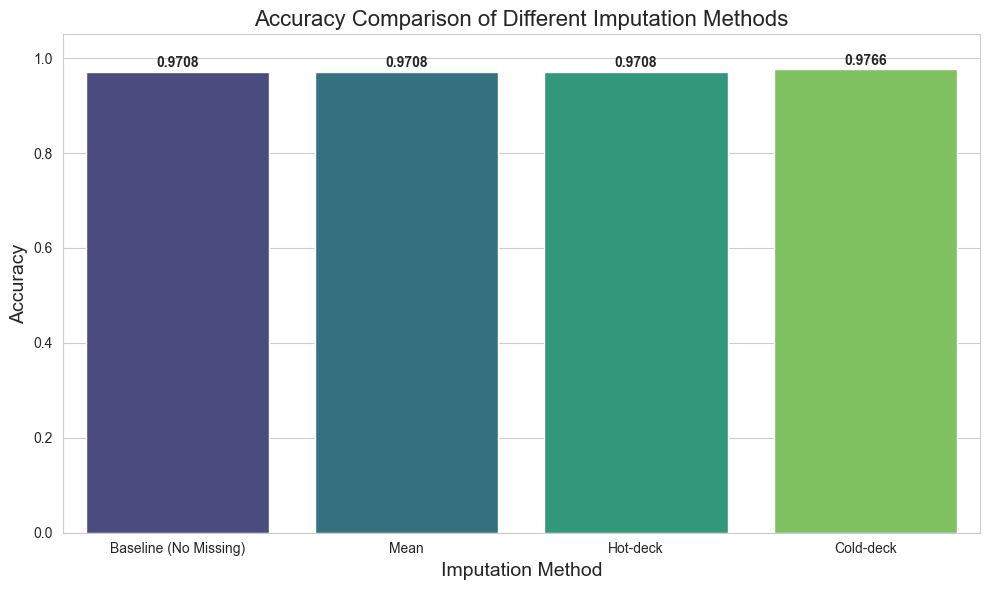


===== Analysis and Conclusions =====
1. Baseline (no missing values) typically achieves the highest accuracy
2. Hot-deck imputation often performs better than simple mean imputation
3. Cold-deck imputation performance depends on how relevant the reference data is
4. The optimal imputation method depends on your specific dataset and ML task


In [5]:
# Visualize accuracy comparison
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Create bar plot
ax = sns.barplot(
    x='Imputation Method',
    y='Accuracy',
    data=results,
    palette="viridis"
)

# Add value labels on top of each bar
for i, v in enumerate(results['Accuracy']):
    ax.text(
        i, 
        v + 0.01, 
        f'{v:.4f}', 
        ha='center',
        fontweight='bold'
    )

plt.title('Accuracy Comparison of Different Imputation Methods', fontsize=16)
plt.xlabel('Imputation Method', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.ylim(0, 1.05)  # Set y-axis limit
plt.tight_layout()
plt.show()

# Analysis and Conclusions
print("\n===== Analysis and Conclusions =====")
print("1. Baseline (no missing values) typically achieves the highest accuracy")
print("2. Hot-deck imputation often performs better than simple mean imputation")
print("3. Cold-deck imputation performance depends on how relevant the reference data is")
print("4. The optimal imputation method depends on your specific dataset and ML task")